# 지도학습알고리즘

## mglearn 
matplotlib기반으로 한 샘플러. 패키지테스트에 쓸 데이터를 만들어 주는 패키지



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn #데이터만들고 그림도 그림. 테스트에 쓸 데이터를 만들어 주는 패키지


# make_forge() 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


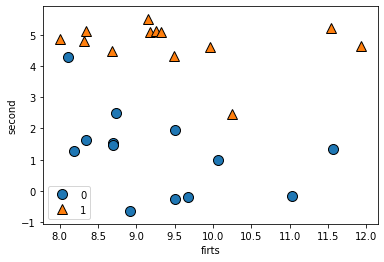

In [2]:
X,y=mglearn.datasets.make_forge() 
#X=feature,y=label
## X는 반드시 대문자
#빨간색은 경고이므로 무시해도 됌

#삼각형을 그리는 메소드
mglearn.discrete_scatter(X[:,0],X[:,1],y) 
plt.xlabel('firts') #한글로 표기시 깨지므로 영어로 표현
plt.ylabel('second')
plt.legend()
# (X[:,0)],X[:,1],y) x=x좌표는 0번축 x좌표는 1번축,y의 값)

# make_wave

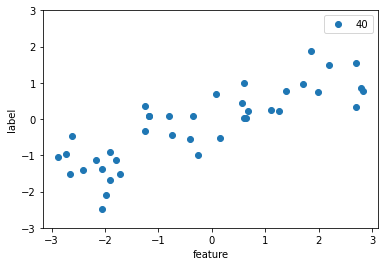

In [3]:
X,y=mglearn.datasets.make_wave(n_samples=40) 

plt.plot(X,y,'o') #'o'마크지정
plt.ylim(-3,3) #폭지정


plt.xlabel('feature') #한글로 표기시 깨지므로 영어로 표현
plt.ylabel('label')
plt.legend(X.shape)

In [4]:
from sklearn.datasets import load_breast_cancer #대문자주의
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
cancer.data.shape

(569, 30)

In [6]:
# cancer.target #타겟=양성, 음성여부 
# cancer.target_names 
# #'array(['malignant', 'benign'], dtype='<U9')
# #타겟결과값 양성=malignant', 음성='benign'
cancer.feature_names #증상별 특성값

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# 최근접 알고리즘

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


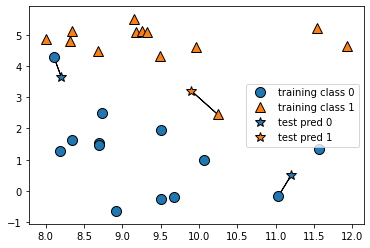

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
#아래 빨간 경고는 범례의 폰트가 없음을 알리는 경고창

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


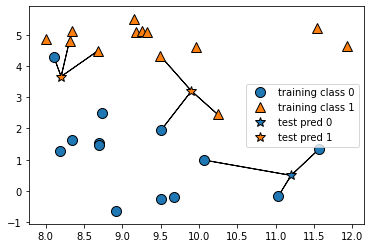

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
#근접한곳의 짝을 지어야 하므로 데이터 형태는 가급적 홀수로 이용

In [10]:
from sklearn.model_selection import train_test_split #split=데이터쪼갬
X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
#최근접 분류알고리즘 셋팅, 근처 참조하느 파라메타=3개
from sklearn.neighbors import KNeighborsClassifier
clf =KNeighborsClassifier(n_neighbors=5)
#clf=알고리즘을 저장하는 변수 이름

In [12]:
#fit=적용, 학습시키는 명령
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [14]:
clf.score(X_test,y_test) 

0.8571428571428571

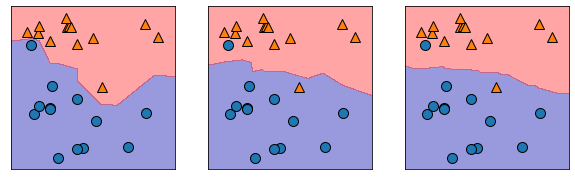

In [15]:
fig,axes=plt.subplots(1,3 , figsize=(10,3))
#fig=그림출력,axes그림판의 축
#ubplots(1,3 = 1줄에 3개 서브플롯을 나란히 그릴거다., figsize=(10,3)
for n_neighbors,ax in zip([1,3,9], axes):
 clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
 clf.fit(X, y)

 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)

 mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
#이제 그래프레 점을 찍음

들여쓰기 오류. 반드시 for이하의 명령은 **띄워**줘야하는데.  탭키눌러서 띄우니 그래프 잘 안나옴.<P>
    탭키말고 스페이스바 눌러서 한칸 띄워야 clf가 빨간색이 됌<P>
- **그래프해석** <P>
    좌부터 우 순으로 1개축, 3개축 9개 축 기준으로 도출해낸 그래프<P>
    점의 위치로 봤을때 결과는 크게 달라지지 않지만  축의 수에 따라 데이터의 경계가 굴곡이 심해짐. =축이 적을수록 데이터가 가진 특성이 도드라져있음.<P>
    축이 많아 질 수 록 데이터 고유의 특성이 완화되어 그레프의 곡선으로 반영됨.
   ** 즉, 데이터의 특성에 말려들어가지 않음**
    
- 어떤상황에서도 학습에 사용된데이터로 테스트 하면 안됌. (오픈북테스트랑 같아짐. 정확하지 않은 결과값나옴)
    

In [16]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train, y_test=train_test_split(
cancer.data,cancer.target,random_state=66)

In [17]:
#실험을 여러번 반복하면서  결과변화를 확인하는 그래프
training_accuracy=[] 
test_accuracy=[]
#위: 반복을 실행할 변수들

#변수에 넣을 리스트생성=최근접의 개수를 1~11까지 반복할것임
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    #한줄로 모델, 파라메터 지정, 핏까지 설정가능
    
    #위의 학습결과 채점
    training_accuracy.append(clf.score(X_train,y_train)) #학습(훈련)정확도
    test_accuracy.append(clf.score(X_test,y_test))  #테스트정확도, 이 스코어가 잘나오는게 더 중요
    

In [18]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'Accuracy')

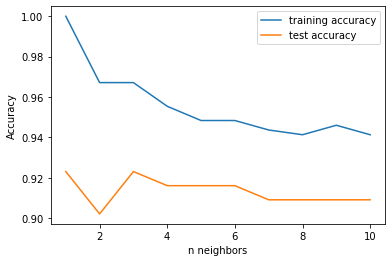

In [19]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
#plt.plot(X축(반복하는 횟수, 학습/테스트 정확도, 라벨=그래프명)
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')

**그래프해석**
트레이닝과 테스트 결과값이 가장 근접한 횟수는 3회째이다.<P>
그러므로 이 데이터의 이상적인 학습횟수는 3회이다<P>--------------------
    지금까지 최근접에 접근하는<P>
## classification

# regression 최근접

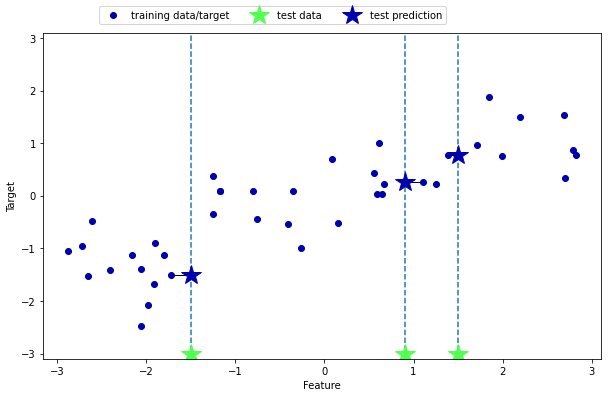

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

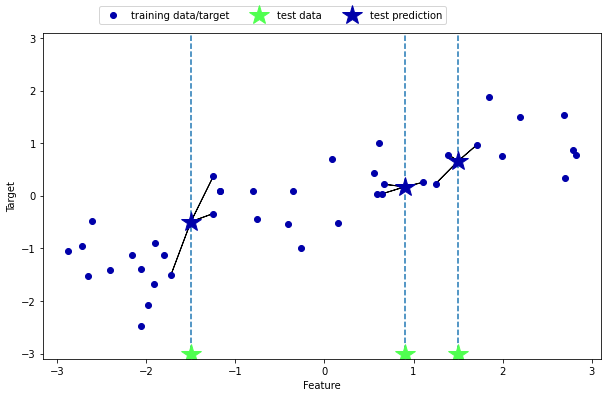

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
X,y=mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # m오타주의

reg=KNeighborsRegressor(n_neighbors=3)
#변수설정=(n_neighbors=3 최근접의 개수는 3개)
#아래. 위 변수에 학습명령
reg.fit(X_train,y_train) #r탈자주의

KNeighborsRegressor(n_neighbors=3)

In [23]:
reg.predict(X_test) #학습을 통한 예측 출력명령
reg.score(X_test, y_test) #결과 채점

0.8344172446249605

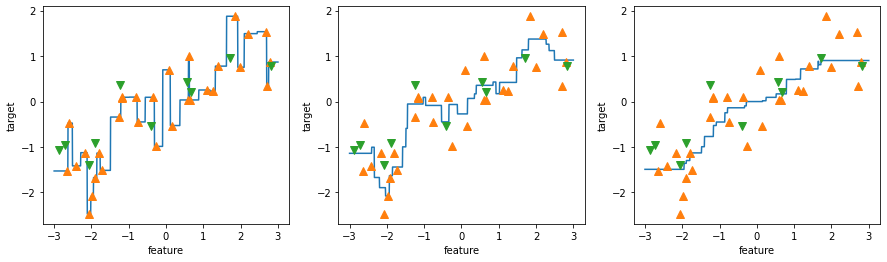

In [24]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

line= np.linspace(-3,3,1000).reshape(-1,1)
#np.linspace=사이에 데이터를 만드는 명령(-3~3사이에 1000데이터 생성).
##reshape(-1,1) 데이터를 1개안에 각각의 리스트들어가게끔 모양바꿔줌

for n_neighbors,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors) #오타 ./=구분
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',markersize=8) #학습결과 출력
    ax.plot(X_test, y_test,'v',markersize=8) # 테스트결과 출력
    
    #라벨링하기
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

In [25]:
# #그래프해석
# 각 그래프마다  -3~3까지 구간에 1000개의 데이터 생성해서 
# 샘플 40개의 최근접점을 각 1개 3개 9개로 찍어서 꺽은선 그래프 출력함. 
#  최근접점 갯수가 늘어날수록 데이터특성이 뭉개지면서 꺾은선이 완만해짐
    #테스트 결과를 점첩시켜분석해서 9개가 객관적 답을 낼 수 있는 조건임을 확인

w[0]: 0.393906  b: -0.031804


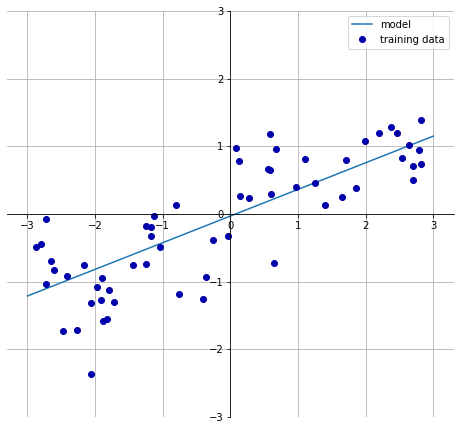

In [26]:
# 위 세가지 꺾은선의 평균을 잡으면 신뢰할수 있는 데이터 도출 가능
# 평균잡는 방법=선형회기"linear_regression"
mglearn.plots.plot_linear_regression_wave()

In [27]:
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

#위에 생성한 리니어모델 저장 변수 [ㅣr생성]
lr=LinearRegression().fit(X_train,y_train)

In [28]:
#학습/테스트 결과확인
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))


0.6700890315075756
0.65933685968637


In [29]:
print(lr.coef_) #기울기
print(lr.intercept_) #절편

[0.39390555]
-0.031804343026759746


# 선형회기 case study2
보스톤집값

In [30]:
X,y=mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0)
lr=LinearRegression().fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [31]:
#위 데이터[보스턴집값]은 곧 없어질 예정이니 캘리포니아집값으로 테스트돌려보라고 안내매세지뜸
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9520519609032725
0.6074721959665896


# ridge/릿지 회귀 알고리즘

In [32]:
from sklearn. linear_model import Ridge
#리니어 리그리션->릿지리그리션으로 바꿈

ridge = Ridge().fit(X_train, y_train) #fit 오타주의

print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.8857966585170943
0.7527683481744758


In [33]:
# #해석- 선형회귀와 릿지회귀 차이
# 선형회귀 학습=고점, 테스트= 정확도 떨어짐
# 학습 0.9520519609032725
# 테스트 0.6074721959665896
# 학습/테스트간의 편차심함
 
# 릿지회귀 학습=저점, 테스트= 정확도 떨어짐
# 학습 0.8857966585170943
# 테스트 0.7527683481744758
# 학습/테스트간 편차 적음
#릿지알고리즘은 학습에 매몰을 막기위해 학습량에 제약을 건다.

In [34]:
# alpha=제약 
#조건: 10의 학습량제약
ridge10= Ridge(alpha=10).fit(X_train, y_train) #언더바오타

print(ridge10.score(X_train,y_train)) #점오타-_-
print(ridge10.score(X_test,y_test))


0.7882787115369615
0.635941148917731


In [35]:
# 조건: 01의 학습량제약
ridge01= Ridge(alpha=0.1).fit(X_train, y_train)

print(ridge01.score(X_train,y_train)) 
print(ridge01.score(X_test,y_test))


0.9282273685001989
0.7722067936480024


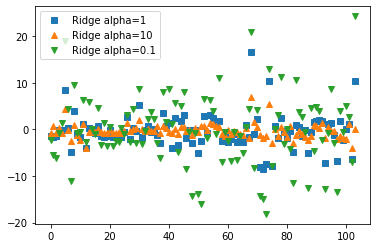

In [36]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.legend()

In [37]:
#분포도해석
# 10일 경우 제약이 걸려 범위가 좁음
# 0.1 제약풀리면서 범위가 넓어짐
# 1=디폴트. 
#따라서.제약이 얼마나 걸리느냐에 따라 예측값의 편차도 달라짐

# lasso/ 라쏘회귀

In [38]:
from sklearn.linear_model import Lasso

#라쏘 변수 지정
lasso= Lasso().fit(X_train,y_train)

print(lasso.score(X_train,y_train)) #학습정확도파악
print(lasso.score(X_test,y_test)) #테스트정확도파악

0.29323768991114596
0.20937503255272272


In [39]:
#형편없는 결과나옴. 이제 조정해야함

lasso001=Lasso(alpha=0.01).fit(X_train, y_train)

print(lasso001.score(X_train,y_train)) 
print(lasso001.score(X_test,y_test)) 

0.8961122320864717
0.7677995670886713


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [48]:
#결과값 현저히 향상. 제약을 더 줄여봄

lasso00001=Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

print(lasso00001.score(X_train,y_train)) 
print(lasso00001.score(X_test,y_test)) 


0.9420931515237063
0.6976541391663624


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [41]:
# 학습결과 향상, 테스트결과 저하.
#제약을 낮춘결과 학습에 최적화되어 그 외 데이터(테스트)에는 수치가 떨어짐을 확인


lasso0=Lasso(alpha=0).fit(X_train, y_train)

print(lasso0.score(X_train,y_train)) 
print(lasso0.score(X_test,y_test)) 

C:\Users\Admin\AppData\Local\Temp/ipykernel_7832/1052944909.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso0=Lasso(alpha=0).fit(X_train, y_train)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.9426383219008584
0.6916323869060224


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [42]:
#라쏘, 릿지의 제약이 0일경우 리니어리그리션과 크게 다르지않음을 확인=정확도 떨어짐

### case study_Lasso

In [43]:
lasso01=Lasso(alpha=0.1).fit(X_train, y_t rain)

print(lasso01.score(X_train,y_train)) 
print(lasso01.score(X_test,y_test)) 

0.7709955157630053
0.630200997611004


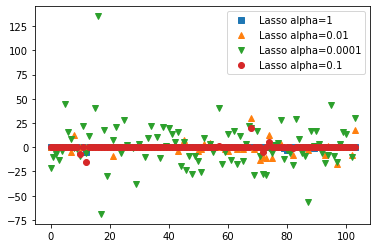

In [46]:
plt.plot(lasso.coef_,'s', label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v', label='Lasso alpha=0.0001')
plt.plot(lasso01.coef_,'o', label='Lasso alpha=0.1')
#plt.plot(lasso.coef_,요소의 결정개수)
plt.legend()

In [49]:
#그래프해석
#동일한 라쏘알고리즘에 각각의 제약을 걸어 결과값분포도를 확인결과
#가장 넓게 분포하고있는 0.00001 제약이 0에 수렴하지 않고 데이터의 특성을 살려내는 테스트가 가능한것을 확인.


# 분류에 대한 선형모델

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


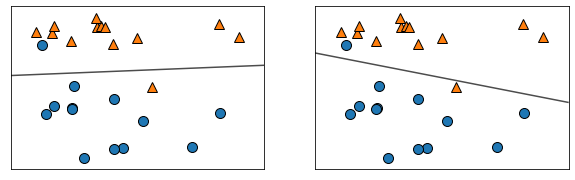

In [50]:
from sklearn.linear_model import LogisticRegression #생긴건 이래도 classification 알고리즘 중 하나
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

fig,axes=plt.subplots(1,2, figsize=(10,3)) #그래프를 그림. 한줄에 2개를 나란히둠.

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
        #모델에 첫번째축에는 리니어, 두번째축에는 로지스틱리그리션  알고리즘 순으로 대입이 될것이다.
    #파라메타가 유사할 경우만 신빙성 있는 결과 얻을 수 있음
    clf=model.fit(X, y) #대소문자 오타
    
    mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5, 
                                    alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax) #쉼표
    


#위 그래프 첫번째 리니어svc, 두번째 로지스틱리그리션 그래프생성<p>
**case study**
옵션지정 =parameta
hyper prameta=파라메타를 조정하며 원하는 값에 근접해가는 과정

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


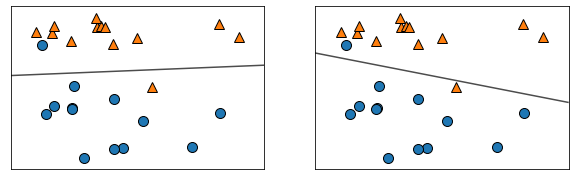

In [54]:
X,y=mglearn.datasets.make_forge()

fig,axes=plt.subplots(1,2, figsize=(10,3)) #그래프를 그림. 한줄에 2개를 나란히둠.

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
      
    clf=model.fit(X, y) #대소문자 오타
    
    mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5, 
                                    alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax) #쉼표
    

### 유방암데이터로 선형분류

In [52]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state=42 )
                                                                                                       
# tain_test_split(X=cancer.data,y=cancer.target, random stat,,...
#데이터로드끝
#로지스틱리그리션 알고리즘 생성

logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)
#로지스틱리그리션은 임계점에 도달하면 5000번까지 반복하지 않음

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))


0.960093896713615
0.965034965034965


In [55]:
logreg100 = LogisticRegression(max_iter=5000,C=100).fit(X_train,y_train)
# 로그리그니션 100으로  변수설정, C파라메타 옵션추가
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))


0.9788732394366197
0.965034965034965


In [56]:
#c 파라메타=오류에 대한 허용치

logreg001 = LogisticRegression(max_iter=5000,C=0.01).fit(X_train,y_train)
# 로그리그니션 001으로  변수설정, C파라메타 옵션추가
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9460093896713615
0.972027972027972


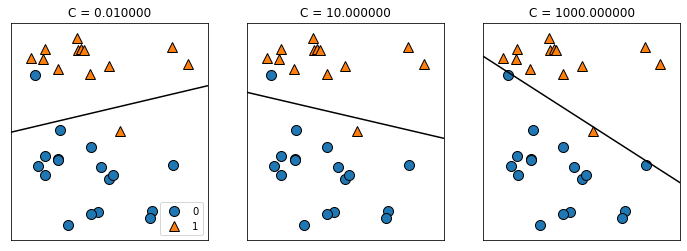

In [51]:


mglearn.plots.plot_linear_svc_regularization()#정규화
#그래프 위의 수치(제약)에 따라 분포가 달라짐

따라서.학습정확도 떨어뜨리고나면 테스트정확도 올라감

분류 알고리즘 (classification)에는 분류집단이 2개, 3개로 나뉨(=카테고리컬알고리즘)/
분류집단갯수에 따라 사용되는 알고리즘도 다름/

 ### case study- 3개집단 분류

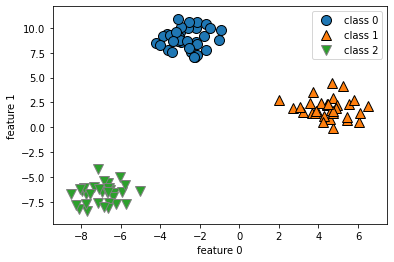

In [60]:
from sklearn. datasets import make_blobs

X, y= make_blobs(random_state=42)
#blobs=직역)얼룩
# 데이터결과가 군데군데 얼룩처럼 여러군집이 생성됨
# 이 여러개가 겹치지 않기 위해 랜덤을 42정도지정

mglearn.discrete_scatter(X[:,0], X[:,1], y)
#x=데이터 y=타겟 
# (X[:,0]=0에 있는 데이터를 x축으로 지정,
#  X[:,1],= x의 1에 있는것을 y축으로 지정
#  y) =색상은 y로 지정
plt. xlabel('feature 0')
plt. ylabel('feature 1')
plt.legend(['class 0','class 1','class 2'])

In [61]:
linear_svm=LinearSVC(). fit(X,y)
#설정변수이름=실제사용알고리즘

In [62]:
print(linear_svm.coef_) #coef=기울기

[[-0.17492576  0.2314106 ]
 [ 0.47621309 -0.06936805]
 [-0.18914091 -0.20400578]]


In [66]:
#위 데이터 해석= 각 6개의 데이터, 3집단을 분류시 필요한 라인 3개+각 라인의 기울기 표현 데이터 3개
##따라서 3개 행, 2개열 형태를 띔
print(linear_svm.coef_.shape) 
print(linear_svm.intercept_) #절편. 라인당 한개씩 있으므로 3개

(3, 2)
[-1.07745235  0.13140472 -0.08604991]


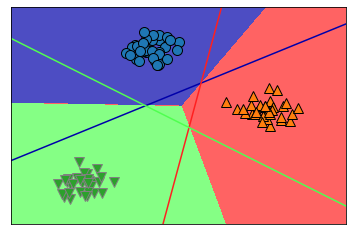

In [74]:


#시각화해서 위 데이터 확인
mglearn.discrete_scatter(X[:,0],X[:,1],y) #ea 오타
line = np.linspace(-15,15) #라인만듦


  #기울기, 절편, 색상 세가지로 표현
for coef,intercept, color in zip(linear_svm.coef_, 
                                linear_svm.intercept_,
                                mglearn.cm3.colors):
  
    plt.plot(line,-(line*coef[0]+intercept)/coef[1], c=color)
    # plt.plot(line,=X축은 '라인'
#     -(line*coef[0]+intercept)/coef[1],=y축 'XW+b'형태지님
#     c=color)-=mglearn.cm3.colors에 따라 적용된 색상


mglearn.plots.plot_2d_classification(linear_svm,X,fill=True, alpha=0.7)
#alpha=투명도


일반적인 리니어한 방법으로 개체를 분석하는 방법은
라인을 세개긋고, 각라인의 중심점을 찾아 분류하는 방식
 이 방법의 문제= 집합(클래스)의 갯수가 많아질 수록 분류가 어려워짐
    라인을 넘어 각자의 영역을 침범하는 집합이 발생하면 데이터의 정확도가 떨어짐
    
    이 문제를 보완한 알고리즘=
## tree계열 분류 알고리즘    

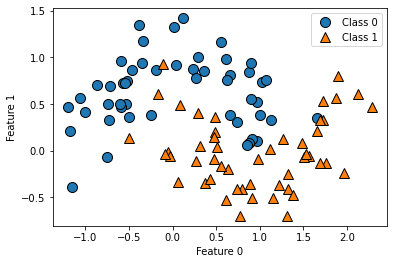

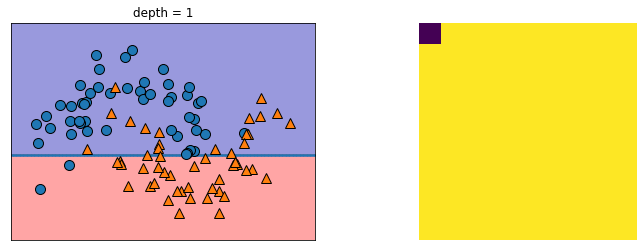

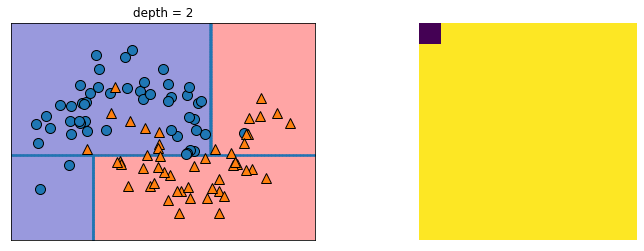

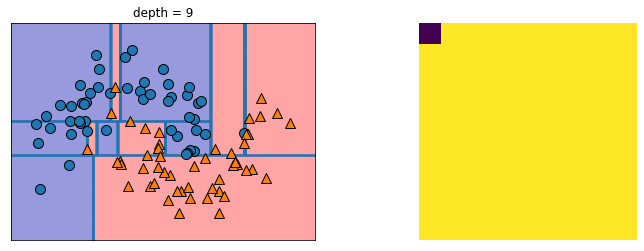

In [76]:
mglearn.plots.plot_tree_progressive()

In [77]:
# tree계열은 depth개념이 포함. (토너먼트식= 뎁스1->뎁스2->뎁스...)
#뎁스가 깊어질 수록 분류의 정확도는 높아짐 
#but 데이터집착문제 초래=방지위해 hyper parameter로 분류횟수결정해야함

In [ ]:
from sklearn.tree